<a href="https://colab.research.google.com/github/yuki-tamaribuchi/kaggle_codes/blob/master/kaggle_titanic_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [56]:
!cp drive/'My Drive'/kaggle.json /root/.kaggle/kaggle.json

In [57]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [59]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
nulls=train_df.isnull().sum()

In [62]:
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
sex_dummy=pd.get_dummies(train_df['Sex'])
pclass_dummy=pd.get_dummies(train_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(train_df['Embarked'],prefix='Emb')

train_df=train_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin'],axis=1)
train_df=pd.concat([train_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())

train_df.head()

y=train_df['Survived']
X=train_df.drop(['Survived'],axis=1)

In [64]:
nulls=train_df.isnull().sum()

In [65]:
nulls

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Emb_C          0
Emb_Q          0
Emb_S          0
dtype: int64

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [67]:
nulls=test_df.isnull().sum()

In [68]:
nulls

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
sex_dummy=pd.get_dummies(test_df['Sex'])
pclass_dummy=pd.get_dummies(test_df['Pclass'],prefix='Pclass')
embarked_dummy=pd.get_dummies(test_df['Embarked'],prefix='Emb')

test_df=test_df.drop(['Ticket','Cabin','Name','Sex','Pclass','Embarked','Cabin'],axis=1)
test_df=pd.concat([test_df,sex_dummy,pclass_dummy,embarked_dummy],axis=1)

test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

test_df.head()

X_test=test_df

In [70]:
X.head()

,PassengerId,Age,SibSp,Parch,Fare,female,male,Pclass_1,Pclass_2,Pclass_3,Emb_C,Emb_Q,Emb_S
0,1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
corr_matrix=train_df.corr()
print(corr_matrix)

             PassengerId  Survived       Age  ...     Emb_C     Emb_Q     Emb_S
PassengerId     1.000000 -0.005007  0.033207  ... -0.001205 -0.033606  0.022148
Survived       -0.005007  1.000000 -0.069809  ...  0.168240  0.003650 -0.155660
Age             0.033207 -0.069809  1.000000  ...  0.032024 -0.013855 -0.027121
SibSp          -0.057527 -0.035322 -0.232625  ... -0.059528 -0.026354  0.070941
Parch          -0.001652  0.081629 -0.179191  ... -0.011069 -0.081228  0.063036
Fare            0.012658  0.257307  0.091566  ...  0.269335 -0.117216 -0.166603
female         -0.042939  0.543351 -0.084153  ...  0.082853  0.074115 -0.125722
male            0.042939 -0.543351  0.084153  ... -0.082853 -0.074115  0.125722
Pclass_1        0.034303  0.285904  0.319916  ...  0.296423 -0.155342 -0.170379
Pclass_2       -0.000086  0.093349  0.006589  ... -0.125416 -0.127301  0.192061
Pclass_3       -0.029486 -0.322308 -0.281004  ... -0.153329  0.237449 -0.009511
Emb_C          -0.001205  0.168240  0.03

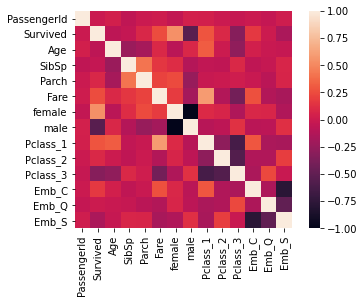

In [76]:
sns.heatmap(corr_matrix,
            square=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [79]:
corr_y=pd.DataFrame({'features':train_df.columns,'corr_y':corr_matrix['Survived']},index=None)
corr_y=corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,PassengerId,-0.005007
1,Survived,1.000000
2,Age,-0.069809
3,SibSp,-0.035322
4,Parch,0.081629
5,Fare,0.257307
6,female,0.543351
7,male,-0.543351
8,Pclass_1,0.285904
9,Pclass_2,0.093349


In [83]:
select_cols=corr_y[corr_y['corr_y'].abs()>0.3]
print(select_cols)

select_cols=list(select_cols['features'])

train_df_new=train_df.loc[:,select_cols]
train_df_new.head()

    features    corr_y
1   Survived  1.000000
6     female  0.543351
7       male -0.543351
10  Pclass_3 -0.322308


,Survived,female,male,Pclass_3
0,0,0,1,1
1,1,1,0,0
2,1,1,0,1
3,1,1,0,0
4,0,0,1,1
